In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sales = pd.read_csv('../input/Asales.csv')
cate = pd.read_csv('../input/item_categories.csv')
item = pd.read_csv('../input/items.csv')
shop = pd.read_csv('../input/shops.csv')

In [22]:
sales.head()
# sales.describe()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [23]:
# sales.info()
(sales.isnull()).sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [24]:
sales.loc[sales['item_cnt_day'] < 0]      #  see negative number of sold item per day

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,05.01.2013,0,25,2552,899.0,-1.0
148,23.01.2013,0,25,2321,999.0,-1.0
175,07.01.2013,0,25,2199,1449.0,-1.0
807,02.01.2013,0,25,2330,599.0,-1.0
1041,13.01.2013,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,26.10.2015,33,25,3917,449.0,-1.0
2934462,18.10.2015,33,25,4896,6398.0,-1.0
2935263,05.10.2015,33,25,10039,249.0,-1.0
2935643,16.10.2015,33,25,7893,2990.0,-1.0


In [25]:
sales.loc[sales['item_price'] < 0]     #   see negative number of item price

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [43]:
sales = sales.loc[sales['item_cnt_day'] >= 0]     #  select sold item which is more than or equal 0
sales = sales.loc[sales['item_price'] >= 0]       #  select item price which is more than or equal 0

sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.928492e+06,2.928492e+06,2.928492e+06,2.928492e+06,2.928492e+06
mean,1.456976e+01,3.300295e+01,1.020028e+04,8.894668e+02,1.248337e+00
std,9.422951e+00,1.622543e+01,6.324396e+03,1.727499e+03,2.619586e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-02,1.000000e+00
25%,7.000000e+00,2.200000e+01,4.477000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.355000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.569100e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [27]:
cate.head()
# cate.describe()

,item_category_name,item_category_id
0,NaN,0
1,NaN,1
2,NaN,2
3,NaN,3
4,NaN,4


In [28]:
item.head()
# item.describe()

,item_name,item_id,item_category_id
0,iname0,0,40
1,iname1,1,76
2,iname2,2,40
3,iname3,3,40
4,iname4,4,40


In [29]:
shop.head()
# shop.describe()

,shop_name,shop_id
0,NaN,0
1,NaN,1
2,NaN,2
3,NaN,3
4,NaN,4


---

📌 📌 **1. แสดงค่าเฉลี่ย, Median และพิสัยระหว่างควอร์ไทล์ (Interquartie Range) ของข้อมูล item_price**

---

In [30]:
sales['item_price'].describe()

count    2.928492e+06
mean     8.894668e+02
std      1.727499e+03
min      7.000000e-02
25%      2.490000e+02
50%      3.990000e+02
75%      9.990000e+02
max      3.079800e+05
Name: item_price, dtype: float64

In [31]:
np.mean(sales['item_price'])     #   this is mean

889.4667512710128

In [32]:
np.percentile(sales['item_price'], 50)   #   this is 50th percentile (median)

399.0

In [33]:
np.percentile(sales['item_price'], 75) - np.percentile(sales['item_price'], 25)      #  this is iqr (q3 - q1)

750.0

---

📌 📌 **2. มีร้านทั้งหมดกี่ shops**

---

In [34]:
shop.describe()

,shop_name,shop_id
count,0.0,60.000000
mean,NaN,29.500000
std,NaN,17.464249
min,NaN,0.000000
25%,NaN,14.750000
50%,NaN,29.500000
75%,NaN,44.250000
max,NaN,59.000000


In [35]:
shop['shop_id'].count()     #  this is shop amount

60

---

📌 📌 **3. รวมข้อมูลในไฟล์ items dataset เข้ากับ sales dataset**

---

In [7]:
sales_item = pd.merge(sales, item, on = 'item_id')     #  merge sales & item
sales_item.head(10)                                    #  see data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,iname22154,37
1,23.01.2013,0,24,22154,999.0,1.0,iname22154,37
2,20.01.2013,0,27,22154,999.0,1.0,iname22154,37
3,02.01.2013,0,25,22154,999.0,1.0,iname22154,37
4,03.01.2013,0,25,22154,999.0,1.0,iname22154,37
5,20.01.2013,0,25,22154,999.0,1.0,iname22154,37
6,23.01.2013,0,25,22154,999.0,1.0,iname22154,37
7,26.01.2013,0,25,22154,999.0,1.0,iname22154,37
8,27.01.2013,0,6,22154,999.0,1.0,iname22154,37
9,10.01.2013,0,15,22154,999.0,1.0,iname22154,37


---

📌 📌 **4. เปลี่ยนชนิดข้อมูล date จาก string เป็นวันที่ date เพื่อการวิเคราะห์ต่อไป**

---

In [45]:
sales_item.info()              #   show type (before convert)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928492 entries, 0 to 2928491
Data columns (total 8 columns):
 #   Column            Dtype  
---  ------            -----  
 0   date              object 
 1   date_block_num    int64  
 2   shop_id           int64  
 3   item_id           int64  
 4   item_price        float64
 5   item_cnt_day      float64
 6   item_name         object 
 7   item_category_id  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 201.1+ MB


In [46]:
sales_item['date'] = pd.to_datetime(sales_item.date, format = '%d.%m.%Y')

In [47]:
sales_item.info()              #  show type (after convert)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928492 entries, 0 to 2928491
Data columns (total 8 columns):
 #   Column            Dtype         
---  ------            -----         
 0   date              datetime64[ns]
 1   date_block_num    int64         
 2   shop_id           int64         
 3   item_id           int64         
 4   item_price        float64       
 5   item_cnt_day      float64       
 6   item_name         object        
 7   item_category_id  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 201.1+ MB


---

📌 📌 **5. แสดงยอดขาย shop ที่ยอดขายรวมสูงสุด 10 อันดับ โดยแสดงเป็นกราฟแท่งแนวนอนเพื่อเปรียบเทียบ**

---

In [48]:
sales_item.head()       #   show data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,2013-01-02,0,59,22154,999.0,1.0,iname22154,37
1,2013-01-23,0,24,22154,999.0,1.0,iname22154,37
2,2013-01-20,0,27,22154,999.0,1.0,iname22154,37
3,2013-01-02,0,25,22154,999.0,1.0,iname22154,37
4,2013-01-03,0,25,22154,999.0,1.0,iname22154,37


In [8]:
sales_item['sales'] = sales_item['item_price'] * sales_item['item_cnt_day']  #  insert sales column (price * pieces)
sales_item.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,sales
0,02.01.2013,0,59,22154,999.0,1.0,iname22154,37,999.0
1,23.01.2013,0,24,22154,999.0,1.0,iname22154,37,999.0
2,20.01.2013,0,27,22154,999.0,1.0,iname22154,37,999.0
3,02.01.2013,0,25,22154,999.0,1.0,iname22154,37,999.0
4,03.01.2013,0,25,22154,999.0,1.0,iname22154,37,999.0


In [52]:
#  build pivot table with index is shop id & show sum of sales

table = pd.pivot_table(sales_item,
                       index = ["shop_id"],
                       values = ["sales"],
                       aggfunc = np.sum)

table = table.reset_index()
table.head(10)

,shop_id,sales
0,0,6.637370e+06
1,1,3.238207e+06
2,2,4.421349e+07
3,3,3.036145e+07
4,4,4.071549e+07
5,5,3.829321e+07
6,6,9.847755e+07
7,7,6.709038e+07
8,8,2.353301e+06
9,9,1.639147e+07


In [53]:
table = table.sort_values(by = ['sales'], ascending = False)     #   sort max to min
table.head(10)                                                   #   see data

,shop_id,sales
31,31,2.356611e+08
25,25,2.169676e+08
28,28,1.601296e+08
42,42,1.522791e+08
54,54,1.424218e+08
27,27,1.408849e+08
57,57,1.133351e+08
12,12,1.131852e+08
6,6,9.847755e+07
18,18,8.366872e+07


In [54]:
top10 = table.head(10)   #  see 1st 10 line only
top10

,shop_id,sales
31,31,2.356611e+08
25,25,2.169676e+08
28,28,1.601296e+08
42,42,1.522791e+08
54,54,1.424218e+08
27,27,1.408849e+08
57,57,1.133351e+08
12,12,1.131852e+08
6,6,9.847755e+07
18,18,8.366872e+07


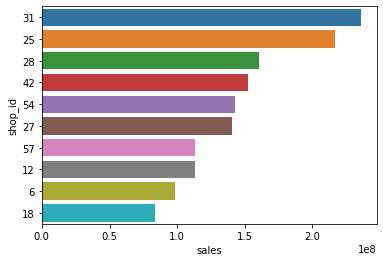

In [55]:
sns.barplot(y = top10['shop_id'], x = top10['sales'], orient = 'h', order = top10['shop_id'])   #  plot chart

---

📌 📌 **6. มีทั้งหมดกี่ items จากทุก shop รวมกัน**

---

In [51]:
sales_item.head()     #  see data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,sales
0,2013-01-02,0,59,22154,999.0,1.0,iname22154,37,999.0
1,2013-01-23,0,24,22154,999.0,1.0,iname22154,37,999.0
2,2013-01-20,0,27,22154,999.0,1.0,iname22154,37,999.0
3,2013-01-02,0,25,22154,999.0,1.0,iname22154,37,999.0
4,2013-01-03,0,25,22154,999.0,1.0,iname22154,37,999.0


In [52]:
(sales_item['item_id'].drop_duplicates()).count()    #  this is an answer

21804

---

📌 📌 **7. แสดง shop ที่มีจำนวน item มากที่สุด 5 shops (พร้อมทั้งจำนวน item) และน้อยที่สุด 5 shops (พร้อมทั้งจำนวน item) โดยนำเสนอเป็น chart**

---

In [27]:
sales_item.head()    #   see data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,sales
0,2013-01-02,0,59,22154,999.0,1.0,iname22154,37,999.0
1,2013-01-23,0,24,22154,999.0,1.0,iname22154,37,999.0
2,2013-01-20,0,27,22154,999.0,1.0,iname22154,37,999.0
3,2013-01-02,0,25,22154,999.0,1.0,iname22154,37,999.0
4,2013-01-03,0,25,22154,999.0,1.0,iname22154,37,999.0


In [28]:
table = sales_item.drop_duplicates(['shop_id','item_id'])     #  drop duplicate item id each shop
table

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,sales
0,2013-01-02,0,59,22154,999.0,1.0,iname22154,37,999.0
1,2013-01-23,0,24,22154,999.0,1.0,iname22154,37,999.0
2,2013-01-20,0,27,22154,999.0,1.0,iname22154,37,999.0
3,2013-01-02,0,25,22154,999.0,1.0,iname22154,37,999.0
8,2013-01-27,0,6,22154,999.0,1.0,iname22154,37,999.0
...,...,...,...,...,...,...,...,...,...
2928487,2015-10-17,33,25,8428,249.0,1.0,iname8428,40,249.0
2928488,2015-10-01,33,25,7903,12198.0,1.0,iname7903,15,12198.0
2928489,2015-10-29,33,25,7610,2890.0,1.0,iname7610,64,2890.0
2928490,2015-10-22,33,25,7635,2100.0,1.0,iname7635,64,2100.0


In [29]:
# build pivot table with index is shop id & count item id

table = pd.pivot_table(table,
                       index = ["shop_id"],
                       values = ["item_id"],
                       aggfunc = 'count')

table.head(10)

,item_id
shop_id,
0,3600
1,2523
2,4849
3,5261
4,7308
5,7084
6,11856
7,8246
8,1909


In [30]:
table = table.reset_index()
table.head(10)

,shop_id,item_id
0,0,3600
1,1,2523
2,2,4849
3,3,5261
4,4,7308
5,5,7084
6,6,11856
7,7,8246
8,8,1909
9,9,1404


In [31]:
table_sort = table.sort_values(by = ['item_id'], ascending = False)     #   sort max to min
top5 = table_sort.head()                                                #   select first of 5th lines
bottom5 = table_sort.tail()                                             #   select last of 5th lines

In [32]:
top5   #  see data

,shop_id,item_id
25,25,15367
31,31,14416
54,54,13862
28,28,12571
57,57,12281


In [33]:
bottom5     #   see data

,shop_id,item_id
9,9,1404
40,40,817
20,20,746
11,11,371
36,36,258


Text(0.5, 1.0, 'worst 5')

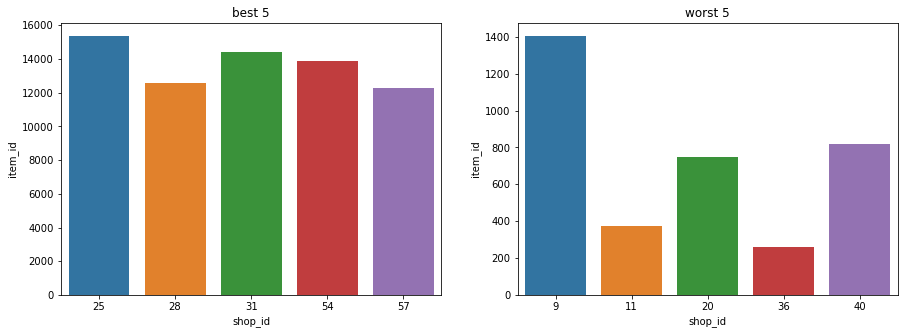

In [34]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5))
sns.barplot(x = 'shop_id', y = 'item_id', data = top5, ax = axes[0], ci = False).set_title('best 5')
sns.barplot(x = 'shop_id', y = 'item_id', data = bottom5, ax = axes[1], ci = False).set_title('worst 5')

---

📌 📌 **8. แสดง item ที่ขายได้มากที่สุดในแต่ละ shop (พร้อมทั้ง item id และจำนวน) ทั้งหมด 10 shops**

---

In [35]:
sales_item.head()     #   see data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,sales
0,2013-01-02,0,59,22154,999.0,1.0,iname22154,37,999.0
1,2013-01-23,0,24,22154,999.0,1.0,iname22154,37,999.0
2,2013-01-20,0,27,22154,999.0,1.0,iname22154,37,999.0
3,2013-01-02,0,25,22154,999.0,1.0,iname22154,37,999.0
4,2013-01-03,0,25,22154,999.0,1.0,iname22154,37,999.0


In [36]:
#  find sum of item sold each day

table = pd.pivot_table(sales_item,
                       index = ["shop_id","item_id"],
                       values = ["item_cnt_day"],
                       aggfunc = np.sum)
table

item_cnt_day
shop_id item_id              
0       30               31.0
        31               11.0
        32               16.0
        33                6.0
        35               15.0
...                       ...
59      22154             1.0
        22155             1.0
        22162            16.0
        22164             6.0
        22167             4.0

[424098 rows x 1 columns]

In [37]:
table = table.reset_index()
table

,shop_id,item_id,item_cnt_day
0,0,30,31.0
1,0,31,11.0
2,0,32,16.0
3,0,33,6.0
4,0,35,15.0
...,...,...,...
424093,59,22154,1.0
424094,59,22155,1.0
424095,59,22162,16.0
424096,59,22164,6.0


In [38]:
table_sort = table.sort_values(by = ['item_cnt_day'], ascending = False)   #   sort max to min
table_sort

,shop_id,item_id,item_cnt_day
230414,31,20949,19934.0
165989,25,20949,14343.0
198864,28,20949,13458.0
382348,54,20949,12323.0
286939,42,20949,10514.0
...,...,...,...
284954,42,17579,1.0
284958,42,17584,1.0
284960,42,17592,1.0
284963,42,17596,1.0


In [39]:
table_sort = table_sort.drop_duplicates(['shop_id'])  #  drop duplicate (consider column shop id only)
table_sort

,shop_id,item_id,item_cnt_day
230414,31,20949,19934.0
165989,25,20949,14343.0
198864,28,20949,13458.0
382348,54,20949,12323.0
286939,42,20949,10514.0
186370,27,20949,8266.0
64250,12,11373,6563.0
407775,57,20949,6116.0
327186,47,20949,4530.0
139988,22,20949,4382.0


In [40]:
table_sort.head(10)      #   this is an answer

,shop_id,item_id,item_cnt_day
230414,31,20949,19934.0
165989,25,20949,14343.0
198864,28,20949,13458.0
382348,54,20949,12323.0
286939,42,20949,10514.0
186370,27,20949,8266.0
64250,12,11373,6563.0
407775,57,20949,6116.0
327186,47,20949,4530.0
139988,22,20949,4382.0


---

📌 📌 **9. categories มีจำนวนทั้งหมดเท่าใด**

---

In [71]:
cate.head()        #   see data

,item_category_name,item_category_id
0,NaN,0
1,NaN,1
2,NaN,2
3,NaN,3
4,NaN,4


In [72]:
cate.describe()     #  see data

,item_category_name,item_category_id
count,0.0,84.000000
mean,NaN,41.500000
std,NaN,24.392622
min,NaN,0.000000
25%,NaN,20.750000
50%,NaN,41.500000
75%,NaN,62.250000
max,NaN,83.000000


In [73]:
cate['item_category_id'].count()    #  this is amount of categories

84

---

📌 📌 **10. แสดง shop ที่มีจำนวน categories มากที่สุด 10 อันดับ (พร้อมทั้งจำนวน)**

---

In [74]:
sales_item.head()   #  see data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,sales
0,2013-01-02,0,59,22154,999.0,1.0,iname22154,37,999.0
1,2013-01-23,0,24,22154,999.0,1.0,iname22154,37,999.0
2,2013-01-20,0,27,22154,999.0,1.0,iname22154,37,999.0
3,2013-01-02,0,25,22154,999.0,1.0,iname22154,37,999.0
4,2013-01-03,0,25,22154,999.0,1.0,iname22154,37,999.0


In [75]:
table = sales_item.drop_duplicates(['shop_id','item_category_id']) #  drop duplicate (column shop id & item category id)
table.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,sales
0,2013-01-02,0,59,22154,999.0,1.0,iname22154,37,999.0
1,2013-01-23,0,24,22154,999.0,1.0,iname22154,37,999.0
2,2013-01-20,0,27,22154,999.0,1.0,iname22154,37,999.0
3,2013-01-02,0,25,22154,999.0,1.0,iname22154,37,999.0
8,2013-01-27,0,6,22154,999.0,1.0,iname22154,37,999.0
9,2013-01-10,0,15,22154,999.0,1.0,iname22154,37,999.0
10,2013-01-10,0,7,22154,999.0,1.0,iname22154,37,999.0
11,2013-01-05,0,31,22154,999.0,1.0,iname22154,37,999.0
12,2013-01-02,0,54,22154,999.0,1.0,iname22154,37,999.0
13,2013-01-14,0,42,22154,999.0,1.0,iname22154,37,999.0


In [76]:
#  build pivot table with index is shop id & count item category id

table = pd.pivot_table(table,
                       index = ["shop_id"],
                       values = ["item_category_id"],
                       aggfunc = 'count')

table = table.reset_index()
table

,shop_id,item_category_id
0,0,48
1,1,41
2,2,59
3,3,58
4,4,61
5,5,60
6,6,63
7,7,60
8,8,43
9,9,38


In [77]:
table = table.sort_values(by = ['item_category_id'], ascending = False)  #  sort max to min
table

,shop_id,item_category_id
25,25,65
12,12,64
16,16,63
6,6,63
38,38,63
37,37,63
56,56,63
31,31,62
44,44,62
42,42,62


In [78]:
table.head(10)   #  see 1st 10 line

,shop_id,item_category_id
25,25,65
12,12,64
16,16,63
6,6,63
38,38,63
37,37,63
56,56,63
31,31,62
44,44,62
42,42,62


---

📌 📌 **11. แสดง product category ที่มียอดขายสูงที่สุด (จากทุก shop รวมกัน) 10 อันดับ**

---

In [79]:
sales_item.head()    #  see data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,sales
0,2013-01-02,0,59,22154,999.0,1.0,iname22154,37,999.0
1,2013-01-23,0,24,22154,999.0,1.0,iname22154,37,999.0
2,2013-01-20,0,27,22154,999.0,1.0,iname22154,37,999.0
3,2013-01-02,0,25,22154,999.0,1.0,iname22154,37,999.0
4,2013-01-03,0,25,22154,999.0,1.0,iname22154,37,999.0


In [80]:
#  build pivot table with index = item category id & find sum of sales

table = pd.pivot_table(sales_item,
                       index = ['item_category_id'],
                       values = ['sales'],
                       aggfunc = np.sum)

table = table.reset_index()
table

,item_category_id,sales
0,0,2.634000e+02
1,1,4.310000e+02
2,2,4.389514e+07
3,3,6.282659e+07
4,4,1.339396e+06
...,...,...
79,79,1.720083e+07
80,80,8.362100e+06
81,81,1.759400e+05
82,82,3.362661e+05


In [81]:
table = table.sort_values(by = ['sales'], ascending = False)  #  sort max to min
table

,item_category_id,sales
19,19,4.135049e+08
20,20,3.743002e+08
12,12,2.930917e+08
23,23,2.606500e+08
30,30,2.579593e+08
...,...,...
1,1,4.310000e+02
52,52,3.000000e+02
0,0,2.634000e+02
51,51,1.290000e+02


In [82]:
top10 = table.head(10)   #  see 1st 10 line
top10

,item_category_id,sales
19,19,4.135049e+08
20,20,3.743002e+08
12,12,2.930917e+08
23,23,2.606500e+08
30,30,2.579593e+08
40,40,1.701256e+08
28,28,1.366278e+08
55,55,1.001632e+08
37,37,9.080841e+07
75,75,8.742161e+07


---

📌 📌 **12. แสดง product categories ทั้งหมดของร้านค้าหมายเลข 20**

---

In [9]:
sales_item.head()     #  see data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,sales
0,02.01.2013,0,59,22154,999.0,1.0,iname22154,37,999.0
1,23.01.2013,0,24,22154,999.0,1.0,iname22154,37,999.0
2,20.01.2013,0,27,22154,999.0,1.0,iname22154,37,999.0
3,02.01.2013,0,25,22154,999.0,1.0,iname22154,37,999.0
4,03.01.2013,0,25,22154,999.0,1.0,iname22154,37,999.0


In [10]:
shop20 = sales_item.loc[sales_item['shop_id'] == 20]   #  see data that shop id = 20 only
shop20

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,sales
707675,03.10.2014,21,20,15298,1259.0,1.0,iname15298,63,1259.0
707676,04.10.2014,21,20,15298,1259.0,2.0,iname15298,63,2518.0
707677,05.10.2014,21,20,15298,1259.0,5.0,iname15298,63,6295.0
873901,01.10.2015,33,20,22088,119.0,1.0,iname22088,83,119.0
873902,02.10.2015,33,20,22088,119.0,2.0,iname22088,83,238.0
...,...,...,...,...,...,...,...,...,...
2935681,04.10.2015,33,20,20453,5399.0,1.0,iname20453,72,5399.0
2935682,01.10.2015,33,20,19965,4399.0,1.0,iname19965,61,4399.0
2935683,03.10.2015,33,20,20336,1549.0,1.0,iname20336,72,1549.0
2935685,02.10.2015,33,20,20348,1549.0,1.0,iname20348,72,1549.0


In [11]:
shop20 = shop20.drop_duplicates(['item_category_id'])    #  drop duplicat item category id column
shop20

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,sales
707675,03.10.2014,21,20,15298,1259.000,1.0,iname15298,63,1259.0
873901,01.10.2015,33,20,22088,119.000,1.0,iname22088,83,119.0
883649,02.10.2014,21,20,20377,1399.000,1.0,iname20377,72,1399.0
890149,04.10.2014,21,20,21488,699.000,4.0,iname21488,62,2796.0
1182186,02.10.2014,21,20,13206,1799.000,2.0,iname13206,69,3598.0
1447942,03.10.2014,21,20,12107,439.000,1.0,iname12107,70,439.0
1516590,05.10.2014,21,20,21087,1299.000,5.0,iname21087,61,6495.0
1902051,03.10.2014,21,20,16056,699.000,2.0,iname16056,64,1398.0
2172683,03.10.2014,21,20,4639,1199.000,1.0,iname4639,67,1199.0
2597246,04.10.2014,21,20,16040,599.000,3.0,iname16040,65,1797.0


In [12]:
shop20[['shop_id','item_category_id']]     #  see 2 columns only

,shop_id,item_category_id
707675,20,63
873901,20,83
883649,20,72
890149,20,62
1182186,20,69
1447942,20,70
1516590,20,61
1902051,20,64
2172683,20,67
2597246,20,65


![image](../pictures/q113.jpg)

---

📌 📌 **13. แสดงสินค้าที่ขายได้มากที่สุดสำหรับกลุ่มสินค้าแต่ละ category**

---

In [56]:
sales_item.head()   #  show data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,sales
0,2013-01-02,0,59,22154,999.0,1.0,iname22154,37,999.0
1,2013-01-23,0,24,22154,999.0,1.0,iname22154,37,999.0
2,2013-01-20,0,27,22154,999.0,1.0,iname22154,37,999.0
3,2013-01-02,0,25,22154,999.0,1.0,iname22154,37,999.0
4,2013-01-03,0,25,22154,999.0,1.0,iname22154,37,999.0


In [57]:
#  build pivot table with index is item category id, item id & find sum of sold item each day

table = pd.pivot_table(sales_item,
                       index = ['item_category_id','item_id'],
                       values = ['item_cnt_day'],
                       aggfunc = np.sum)
table

item_cnt_day
item_category_id item_id              
0                16255             1.0
                 16256             1.0
                 16257             1.0
1                5606              1.0
                 5740              1.0
...                                ...
83               22095             2.0
                 22096             4.0
                 22097             3.0
                 22098             1.0
                 22099             3.0

[21804 rows x 1 columns]

In [58]:
table = table.reset_index()
table

,item_category_id,item_id,item_cnt_day
0,0,16255,1.0
1,0,16256,1.0
2,0,16257,1.0
3,1,5606,1.0
4,1,5740,1.0
...,...,...,...
21799,83,22095,2.0
21800,83,22096,4.0
21801,83,22097,3.0
21802,83,22098,1.0


In [59]:
table = table.sort_values(by = ['item_cnt_day'], ascending = False)  #  sort max to min
table

,item_category_id,item_id,item_cnt_day
19992,71,20949,187660.0
2547,30,2808,17255.0
635,19,3732,16676.0
21767,79,17717,15830.0
4289,35,5822,14522.0
...,...,...,...
7877,40,11230,1.0
7862,40,11202,1.0
15399,56,3654,1.0
7840,40,11171,1.0


In [60]:
table.head(20)    #  show 1st 20 line

,item_category_id,item_id,item_cnt_day
19992,71,20949,187660.0
2547,30,2808,17255.0
635,19,3732,16676.0
21767,79,17717,15830.0
4289,35,5822,14522.0
1596,23,3734,11733.0
283,12,6675,10315.0
2661,30,3731,10105.0
2451,30,1855,10041.0
982,19,16787,9255.0


---

📌 📌 **14. แสดงค่าเฉลี่ย และ s.d. ของราคาขายสินค้าแต่ละร้าน โดยแสดงเพียงร้านที่ค่าเฉลี่ยสูงสุด 10 อันดับและต่ำสุด 10 อันดับ**

---

In [102]:
sales_item.head()   #  see data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,sales
0,2013-01-02,0,59,22154,999.0,1.0,iname22154,37,999.0
1,2013-01-23,0,24,22154,999.0,1.0,iname22154,37,999.0
2,2013-01-20,0,27,22154,999.0,1.0,iname22154,37,999.0
3,2013-01-02,0,25,22154,999.0,1.0,iname22154,37,999.0
4,2013-01-03,0,25,22154,999.0,1.0,iname22154,37,999.0


In [103]:
table = sales_item.drop_duplicates(['shop_id','item_id'])    #  drop duplicate shop id & item id column
table

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,sales
0,2013-01-02,0,59,22154,999.0,1.0,iname22154,37,999.0
1,2013-01-23,0,24,22154,999.0,1.0,iname22154,37,999.0
2,2013-01-20,0,27,22154,999.0,1.0,iname22154,37,999.0
3,2013-01-02,0,25,22154,999.0,1.0,iname22154,37,999.0
8,2013-01-27,0,6,22154,999.0,1.0,iname22154,37,999.0
...,...,...,...,...,...,...,...,...,...
2928487,2015-10-17,33,25,8428,249.0,1.0,iname8428,40,249.0
2928488,2015-10-01,33,25,7903,12198.0,1.0,iname7903,15,12198.0
2928489,2015-10-29,33,25,7610,2890.0,1.0,iname7610,64,2890.0
2928490,2015-10-22,33,25,7635,2100.0,1.0,iname7635,64,2100.0


In [104]:
#  build pivot table with index is shop id & find mean, std of item price

table = pd.pivot_table(table,
                       index = ['shop_id'],
                       values = ['item_price'],
                       aggfunc = [np.mean,np.std])

table = table.reset_index()
table

,shop_id,mean,std
,,item_price,item_price
0,0,437.071111,1042.803463
1,1,429.786762,1015.683848
2,2,1184.317070,2320.273455
3,3,968.551662,1925.431092
4,4,853.149373,1782.888651
5,5,845.495336,1824.321733
6,6,839.105341,1644.297896
7,7,870.060647,1773.088547
8,8,610.646357,1000.166466


In [108]:
table = table.sort_values([('mean', 'item_price')], ascending = False)  #  sort max to min of item price (mean)
table.head(10)                                                          #   show 1st 10 line

,shop_id,mean,std
,,item_price,item_price
20,20,1415.960961,1018.404265
9,9,1366.047847,1580.978739
34,34,1316.768234,2598.321019
12,12,1208.929381,4373.648512
36,36,1193.504651,2457.479001
2,2,1184.317070,2320.273455
40,40,1119.562424,1014.681478
49,49,1023.291547,2077.318796
39,39,1022.805172,2143.877210


In [109]:
table.tail(10)      #   show last 10 lines

,shop_id,mean,std
,,item_price,item_price
30,30,715.793950,1427.587506
55,55,699.582967,1503.405199
10,10,687.521941,1669.180011
8,8,610.646357,1000.166466
23,23,606.245790,1195.191386
32,32,555.504995,924.561602
51,51,532.200579,1366.068405
0,0,437.071111,1042.803463
1,1,429.786762,1015.683848


![image](../pictures/q115.jpg)

---

📌 📌 **15. แสดงยอดขายรวมของกลุ่ม 6 กลุ่ม โดยแบ่งจากยอดขายของสินค้าทุกร้านจากมากไปน้อย**

---

In [110]:
sales_item.head()      #   show data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,sales
0,2013-01-02,0,59,22154,999.0,1.0,iname22154,37,999.0
1,2013-01-23,0,24,22154,999.0,1.0,iname22154,37,999.0
2,2013-01-20,0,27,22154,999.0,1.0,iname22154,37,999.0
3,2013-01-02,0,25,22154,999.0,1.0,iname22154,37,999.0
4,2013-01-03,0,25,22154,999.0,1.0,iname22154,37,999.0


In [111]:
# build pivot table with index is shop id & find sales sum

table = pd.pivot_table(sales_item,
                       index = ["shop_id"],
                       values = ["sales"],
                       aggfunc = np.sum)

table = table.reset_index()
table

,shop_id,sales
0,0,6.637370e+06
1,1,3.238207e+06
2,2,4.421349e+07
3,3,3.036145e+07
4,4,4.071549e+07
5,5,3.829321e+07
6,6,9.847755e+07
7,7,6.709038e+07
8,8,2.353301e+06
9,9,1.639147e+07


In [112]:
table = table.sort_values(['sales'], ascending = False)   #  sort max to min
table

,shop_id,sales
31,31,2.356611e+08
25,25,2.169676e+08
28,28,1.601296e+08
42,42,1.522791e+08
54,54,1.424218e+08
27,27,1.408849e+08
57,57,1.133351e+08
12,12,1.131852e+08
6,6,9.847755e+07
18,18,8.366872e+07


In [113]:
#  insert group column to group data

table['group'] = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                  2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                  3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                  4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
                  5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
                  6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
table

,shop_id,sales,group
31,31,2.356611e+08,1
25,25,2.169676e+08,1
28,28,1.601296e+08,1
42,42,1.522791e+08,1
54,54,1.424218e+08,1
27,27,1.408849e+08,1
57,57,1.133351e+08,1
12,12,1.131852e+08,1
6,6,9.847755e+07,1
18,18,8.366872e+07,1


In [114]:
# build pivot table with index is group & find sales sum

table = pd.pivot_table(table,
                       index = ['group'],
                       values = ['sales'],
                       aggfunc = np.sum)

table = table.reset_index()
table

,group,sales
0,1,1.457011e+09
1,2,7.057062e+08
2,3,5.778313e+08
3,4,4.286198e+08
4,5,1.998545e+08
5,6,4.083359e+07


<function matplotlib.pyplot.show(*args, **kw)>

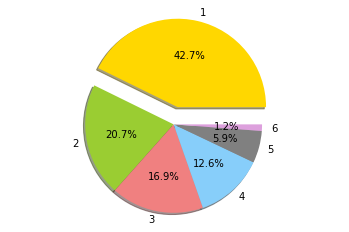

In [115]:
# Data to plot

labels = table['group']
sizes  = table['sales']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'gray', 'plum']
explode = (0.2, 0, 0, 0, 0, 0)

# Plot
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%',
        shadow = True, startangle = 0)      #  start at x-axis(+)

plt.axis('equal')          #   ensure it is circle
plt.show

![image](../pictures/q116.jpg)

---

📌 📌 **16. แสดงยอดขายรวมรายวันของแต่ละเดือน โดยแกน x เป็นวัน, แกน y เป็นยอดขาย (กราฟมี 12 เส้นสำหรับ 12 เดือน)**

---

In [61]:
sales_item.head()      #   show data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,sales
0,2013-01-02,0,59,22154,999.0,1.0,iname22154,37,999.0
1,2013-01-23,0,24,22154,999.0,1.0,iname22154,37,999.0
2,2013-01-20,0,27,22154,999.0,1.0,iname22154,37,999.0
3,2013-01-02,0,25,22154,999.0,1.0,iname22154,37,999.0
4,2013-01-03,0,25,22154,999.0,1.0,iname22154,37,999.0


In [62]:
# remove some columns that are likely not to be used anymore

df = sales_item.drop(columns = ['date_block_num', 'item_name', 'item_category_id'])
df.head()

,date,shop_id,item_id,item_price,item_cnt_day,sales
0,2013-01-02,59,22154,999.0,1.0,999.0
1,2013-01-23,24,22154,999.0,1.0,999.0
2,2013-01-20,27,22154,999.0,1.0,999.0
3,2013-01-02,25,22154,999.0,1.0,999.0
4,2013-01-03,25,22154,999.0,1.0,999.0


In [63]:
df['day']   = ((df.date).dt).day              #  insert day column
df['month'] = ((df.date).dt).month_name()     #  insert month column
df['year']  = ((df.date).dt).year             #  insert year column

df.head()                                     #  see data

,date,shop_id,item_id,item_price,item_cnt_day,sales,day,month,year
0,2013-01-02,59,22154,999.0,1.0,999.0,2,January,2013
1,2013-01-23,24,22154,999.0,1.0,999.0,23,January,2013
2,2013-01-20,27,22154,999.0,1.0,999.0,20,January,2013
3,2013-01-02,25,22154,999.0,1.0,999.0,2,January,2013
4,2013-01-03,25,22154,999.0,1.0,999.0,3,January,2013


In [64]:
# build pivot table with index is year, month, day & find sales sum

table = pd.pivot_table(df,
                       index = ["year","month","day"],
                       values = ["sales"],
                       aggfunc = np.sum)
table

sales
year month     day              
2013 April     1    1.829816e+06
               2    1.893208e+06
               3    1.778214e+06
               4    1.820236e+06
               5    2.539158e+06
...                          ...
2015 September 26   4.084407e+06
               27   3.456074e+06
               28   3.002577e+06
               29   6.682603e+06
               30   6.017448e+06

[1034 rows x 1 columns]

In [65]:
table = table.reset_index()
table

,year,month,day,sales
0,2013,April,1,1.829816e+06
1,2013,April,2,1.893208e+06
2,2013,April,3,1.778214e+06
3,2013,April,4,1.820236e+06
4,2013,April,5,2.539158e+06
...,...,...,...,...
1029,2015,September,26,4.084407e+06
1030,2015,September,27,3.456074e+06
1031,2015,September,28,3.002577e+06
1032,2015,September,29,6.682603e+06


In [66]:
y2013 = table.loc[table['year'] == 2013]      #   select year 2013 only
y2013

,year,month,day,sales
0,2013,April,1,1829816.00
1,2013,April,2,1893208.00
2,2013,April,3,1778214.00
3,2013,April,4,1820236.00
4,2013,April,5,2539158.30
...,...,...,...,...
360,2013,September,26,4676407.40
361,2013,September,27,3924704.00
362,2013,September,28,5517814.00
363,2013,September,29,4111360.00


In [67]:
y2014 = table.loc[table['year'] == 2014]      #   select year 2014 only
y2014

,year,month,day,sales
365,2014,April,1,1.948042e+06
366,2014,April,2,2.038286e+06
367,2014,April,3,2.196651e+06
368,2014,April,4,2.743502e+06
369,2014,April,5,4.386784e+06
...,...,...,...,...
725,2014,September,26,1.137574e+07
726,2014,September,27,7.189875e+06
727,2014,September,28,5.018008e+06
728,2014,September,29,3.892986e+06


In [68]:
y2015 = table.loc[table['year'] == 2015]      #   select year 2015 only
y2015

,year,month,day,sales
730,2015,April,1,1.706789e+06
731,2015,April,2,1.920839e+06
732,2015,April,3,2.333650e+06
733,2015,April,4,3.649199e+06
734,2015,April,5,2.733807e+06
...,...,...,...,...
1029,2015,September,26,4.084407e+06
1030,2015,September,27,3.456074e+06
1031,2015,September,28,3.002577e+06
1032,2015,September,29,6.682603e+06


Text(0.5, 1.0, 'year 2015')

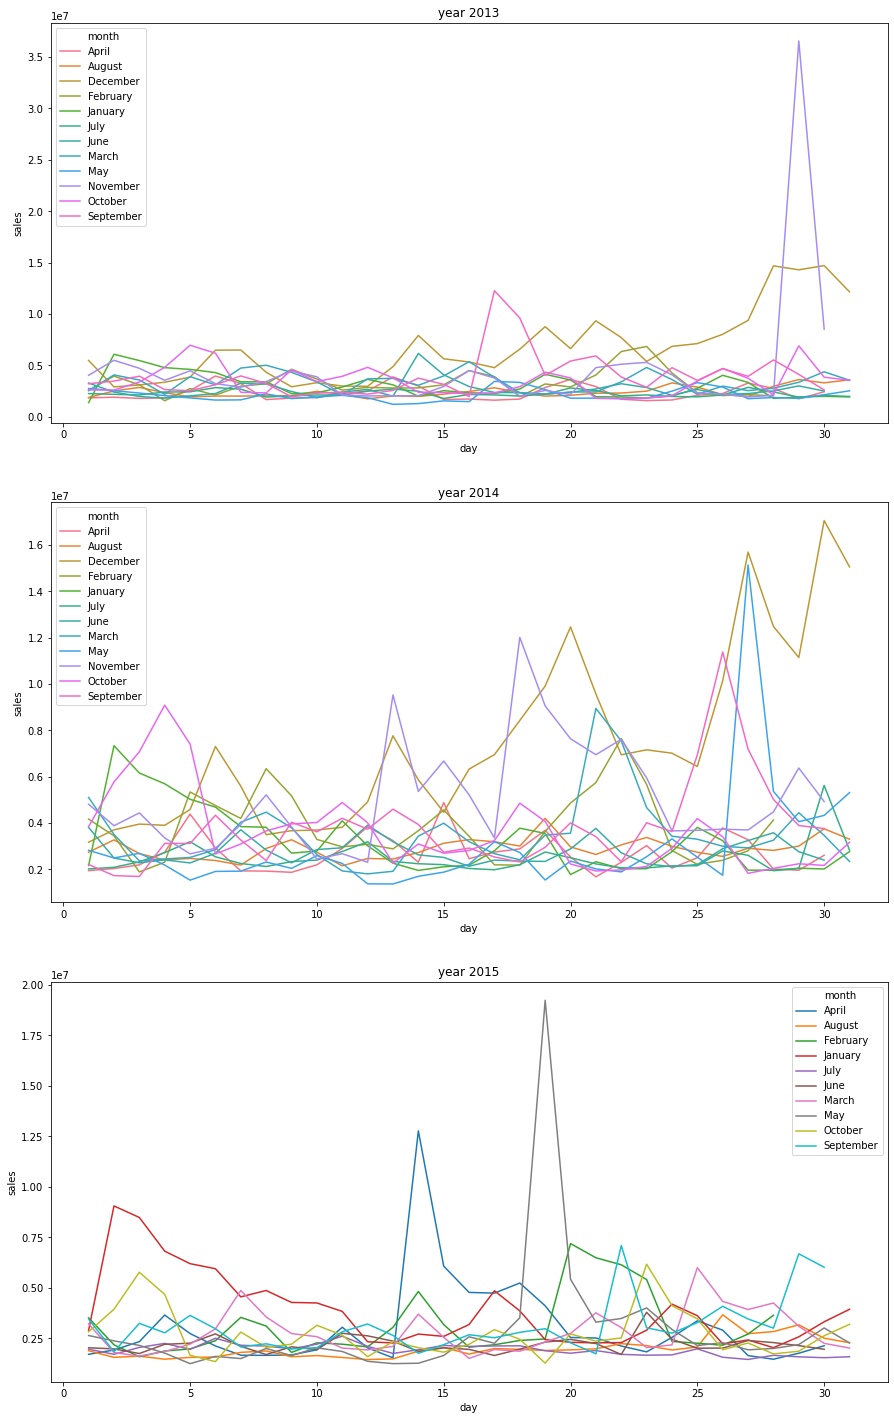

In [69]:
# Set up the matplotlib figure
fig, axes = plt.subplots(3, 1, figsize = (15, 25))

# plot1
sns.lineplot(x = 'day', y = 'sales', data = y2013, hue = 'month', ax = axes[0])
axes[0].set_title('year 2013')

# plot2
sns.lineplot(x = 'day', y = 'sales', data = y2014, hue = 'month', ax = axes[1])
axes[1].set_title('year 2014')

# plot3
sns.lineplot(x = 'day', y = 'sales', data = y2015, hue = 'month', ax = axes[2])
axes[2].set_title('year 2015')

![image](../pictures/q117.jpg)

---

📌 📌 **17. แสดงจำนวนสินค้าที่ขายได้รวมในแต่ละวันของสัปดาห์ และ ยอดขาย**

---

In [70]:
df.head()    #  see data

,date,shop_id,item_id,item_price,item_cnt_day,sales,day,month,year
0,2013-01-02,59,22154,999.0,1.0,999.0,2,January,2013
1,2013-01-23,24,22154,999.0,1.0,999.0,23,January,2013
2,2013-01-20,27,22154,999.0,1.0,999.0,20,January,2013
3,2013-01-02,25,22154,999.0,1.0,999.0,2,January,2013
4,2013-01-03,25,22154,999.0,1.0,999.0,3,January,2013


In [71]:
df['day_of_week'] = (df['date'].dt).day_name()       #   insert (day of week) column
df.head()

,date,shop_id,item_id,item_price,item_cnt_day,sales,day,month,year,day_of_week
0,2013-01-02,59,22154,999.0,1.0,999.0,2,January,2013,Wednesday
1,2013-01-23,24,22154,999.0,1.0,999.0,23,January,2013,Wednesday
2,2013-01-20,27,22154,999.0,1.0,999.0,20,January,2013,Sunday
3,2013-01-02,25,22154,999.0,1.0,999.0,2,January,2013,Wednesday
4,2013-01-03,25,22154,999.0,1.0,999.0,3,January,2013,Thursday


In [72]:
# build pivot table with index is year, month, day & find sales sum, sold item sum

table = pd.pivot_table(df,
                       index = ["year", "day_of_week"],
                       values = ["sales", "item_cnt_day"],
                       aggfunc = {"sales":np.sum, "item_cnt_day":np.sum})
table

item_cnt_day         sales
year day_of_week                            
2013 Friday           239779.0  2.153593e+08
     Monday           169822.0  1.298126e+08
     Saturday         320729.0  2.340160e+08
     Sunday           267994.0  1.899669e+08
     Thursday         193248.0  1.490002e+08
     Tuesday          189956.0  1.589523e+08
     Wednesday        184368.0  1.440363e+08
2014 Friday           198395.0  2.080011e+08
     Monday           144509.0  1.447751e+08
     Saturday         267817.0  2.581301e+08
     Sunday           220162.0  2.042993e+08
     Thursday         168454.0  1.783575e+08
     Tuesday          163025.0  1.818240e+08
     Wednesday        161232.0  1.756384e+08
2015 Friday           116378.0  1.293900e+08
     Monday            88357.0  9.356651e+07
     Saturday         147076.0  1.527751e+08
     Sunday           122138.0  1.229571e+08
     Thursday          94026.0  1.022922e+08
     Tuesday          103170.0  1.308896e+08
     Wednesday         95111.0  1.058164e+08

In [73]:
table = table.reset_index()
table

,year,day_of_week,item_cnt_day,sales
0,2013,Friday,239779.0,2.153593e+08
1,2013,Monday,169822.0,1.298126e+08
2,2013,Saturday,320729.0,2.340160e+08
3,2013,Sunday,267994.0,1.899669e+08
4,2013,Thursday,193248.0,1.490002e+08
5,2013,Tuesday,189956.0,1.589523e+08
6,2013,Wednesday,184368.0,1.440363e+08
7,2014,Friday,198395.0,2.080011e+08
8,2014,Monday,144509.0,1.447751e+08
9,2014,Saturday,267817.0,2.581301e+08


In [74]:
y2013 = table.loc[table['year'] == 2013]      #   select year 2013 only
y2013

,year,day_of_week,item_cnt_day,sales
0,2013,Friday,239779.0,2.153593e+08
1,2013,Monday,169822.0,1.298126e+08
2,2013,Saturday,320729.0,2.340160e+08
3,2013,Sunday,267994.0,1.899669e+08
4,2013,Thursday,193248.0,1.490002e+08
5,2013,Tuesday,189956.0,1.589523e+08
6,2013,Wednesday,184368.0,1.440363e+08


In [75]:
y2014 = table.loc[table['year'] == 2014]      #   select year 2014 only
y2014

,year,day_of_week,item_cnt_day,sales
7,2014,Friday,198395.0,2.080011e+08
8,2014,Monday,144509.0,1.447751e+08
9,2014,Saturday,267817.0,2.581301e+08
10,2014,Sunday,220162.0,2.042993e+08
11,2014,Thursday,168454.0,1.783575e+08
12,2014,Tuesday,163025.0,1.818240e+08
13,2014,Wednesday,161232.0,1.756384e+08


In [76]:
y2015 = table.loc[table['year'] == 2015]      #   select year 2015 only
y2015

,year,day_of_week,item_cnt_day,sales
14,2015,Friday,116378.0,1.293900e+08
15,2015,Monday,88357.0,9.356651e+07
16,2015,Saturday,147076.0,1.527751e+08
17,2015,Sunday,122138.0,1.229571e+08
18,2015,Thursday,94026.0,1.022922e+08
19,2015,Tuesday,103170.0,1.308896e+08
20,2015,Wednesday,95111.0,1.058164e+08


Text(0.5, 1.0, 'sales in year 2015')

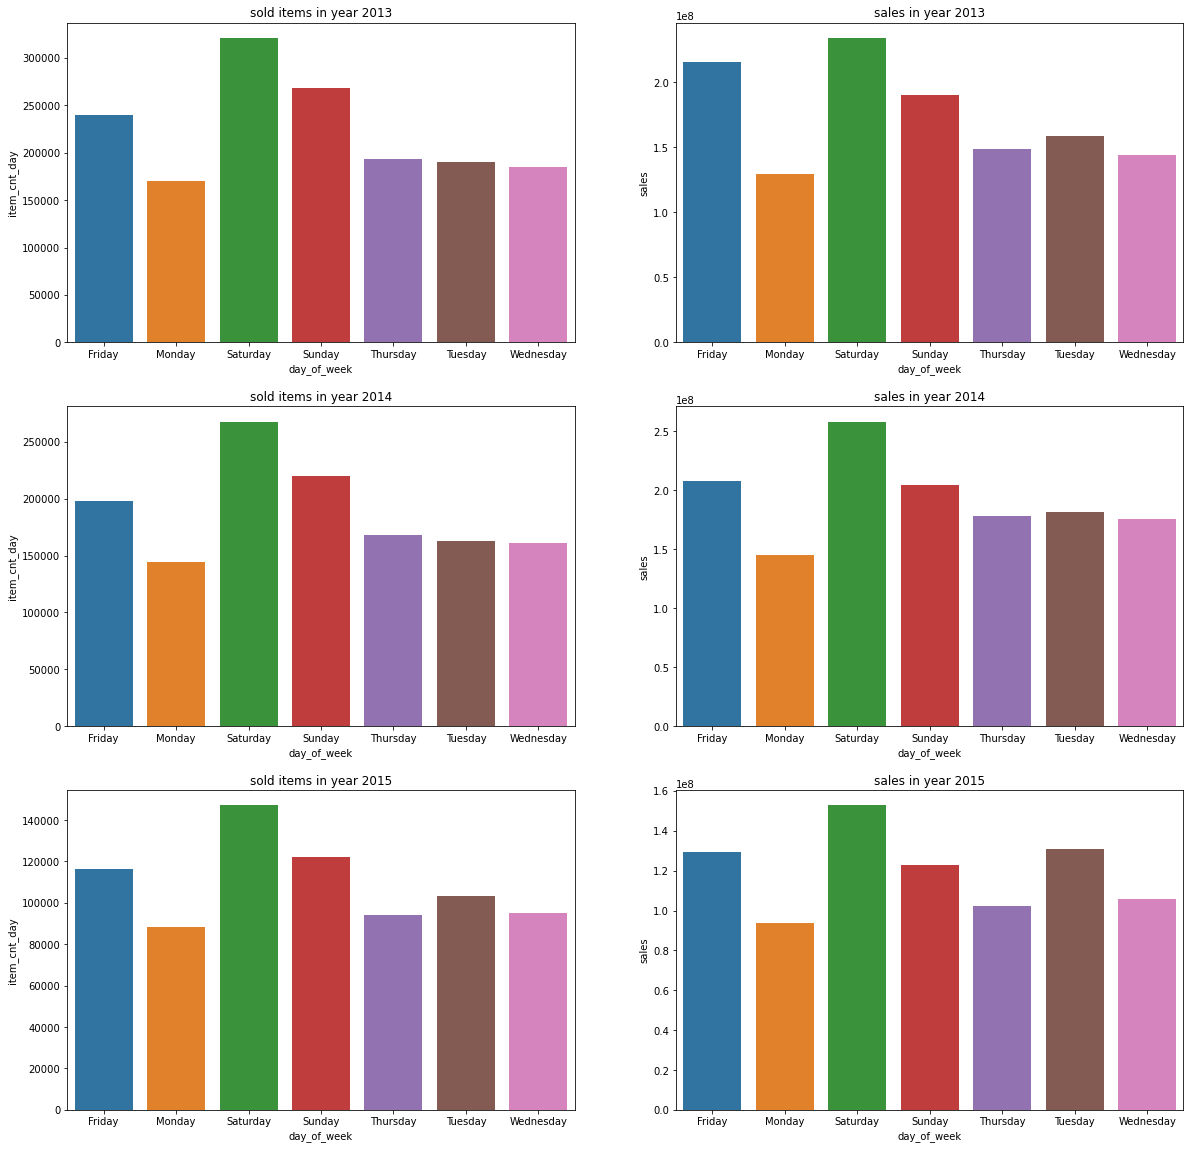

In [77]:
# Set up the matplotlib figure
fig, axes = plt.subplots(3, 2, figsize = (20, 20))

# plot1
sns.barplot(x = 'day_of_week', y = 'item_cnt_day', data = y2013, ci = False, ax = axes[0,0])
axes[0,0].set_title('sold items in year 2013')
sns.barplot(x = 'day_of_week', y = 'sales', data = y2013, ci = False, ax = axes[0,1])
axes[0,1].set_title('sales in year 2013')

# plot2
sns.barplot(x = 'day_of_week', y = 'item_cnt_day', data = y2014, ci = False, ax = axes[1,0])
axes[1,0].set_title('sold items in year 2014')
sns.barplot(x = 'day_of_week', y = 'sales', data = y2014, ci = False, ax = axes[1,1])
axes[1,1].set_title('sales in year 2014')

# plot3
sns.barplot(x = 'day_of_week', y = 'item_cnt_day', data = y2015, ci = False, ax = axes[2,0])
axes[2,0].set_title('sold items in year 2015')
sns.barplot(x = 'day_of_week', y = 'sales', data = y2015, ci = False, ax = axes[2,1])
axes[2,1].set_title('sales in year 2015')